# `AA_workshop 12`: Social Network Analysis

We use the module **NetworkX** package in this tutorial. It is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

You can install the package using one of the following commands:
- Using Conda package manager: `conda install -c anaconda networkx`
- Using Pip package manager: `pip install netowrkx`

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

## Social Network Basics
Each network consists of:

- **Nodes**: The individuals whose network we are building.
- **Edges**: The connection between the nodes. It represents a relationship between the nodes of the network.

### Symmetric Networks (undirected)

The first network that we create is a group of people who work together. This is called a symmetric network because the relationship “working together” is a symmetric relationship: If A is related to B, B is also related to A.

In [3]:
G_symmetric = nx.Graph()

G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle', 'Marc')
G_symmetric.add_edge('George', 'John')
G_symmetric.add_edge('George', 'Steven')

In [4]:
print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


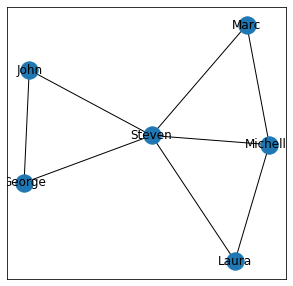

In [5]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G_symmetric);

### Asymmetric Networks (directed)

What if the relationship between nodes is ‘child of’, then the relationship is no longer symmetric. This is the case if someone follows someone else on Twitter. Or in the case of hyperlinks.

If A is the child of B, then B is not a child of A. Such a network where the relationship is asymmetric (A is related to B, does not necessarily means that B is associated with A) is called an Asymmetric network.

We can build the asymmetric network in `NetworkX` using `DiGraph` method, which is short of Directional Graph

In [6]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

To make sure that all nodes are distinctly visible in the network, use the `spring_layout()` function, followed by the `draw_networkx()` function.

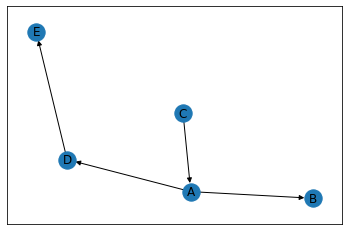

In [7]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

### Weighted Networks
Till now we had networks without weights, but it is possible that networks are made with weights, for example, if in our initial network we consider the number of projects done together as a weight, we will get a weighted Network.

Let us make one again of the employees, but this time we add weight to the network, each edge has a weight signifying the number of projects they have done together.

In [8]:
G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)

In [31]:
G_weighted.edges(data=True)

EdgeDataView([('Steven', 'Laura', {'weight': 25}), ('Steven', 'Marc', {'weight': 8}), ('Steven', 'John', {'weight': 11}), ('Steven', 'Michelle', {'weight': 1}), ('Steven', 'George', {'weight': 4}), ('Laura', 'Michelle', {'weight': 1}), ('Marc', 'Michelle', {'weight': 1}), ('John', 'George', {'weight': 8})])

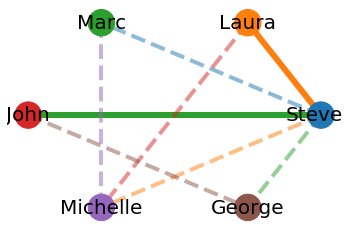

In [45]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes on a circle

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700, node_color = ['C'+str(i) for i in range(6)])

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6, edge_color=['C'+str(i+1) for i in range(len(elarge))])
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=4, alpha=0.5, edge_color=['C'+str(i) for i in range(len(esmall))], style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();

## Clustering coefficient
It is observed that people who share connections in a social network tend to form associations. In other words, there is a tendency in a social network to form clusters.

We can determine the clusters of a node, local clustering coefficient, which is the fraction of pairs of the node’s friends (that is connections) that are connected with each other.

To determine the local clustering coefficient, we make use of `nx.clustering(Graph, Node)` function.

In the symmetric employee-network, you will find that Michelle has a local clustering coefficient of 0.67 and Laura has a local clustering coefficient of 1.

The average clustering coefficient (sum of all the local clustering coefficients divided by the number of nodes) for the symmetric employee-network is 0.867.

In [10]:
nx.clustering(G_symmetric,'Michelle')

0.6666666666666666

In [11]:
nx.clustering(G_symmetric,'Laura')

1.0

In [46]:
nx.clustering(G_symmetric,'John'), nx.clustering(G_symmetric,'George')

(1.0, 1.0)

In [12]:
nx.average_clustering(G_symmetric)

0.8277777777777778

## Network Distance Measures
### Degree
Degree of a node defines the number of connections a node has. NetworkX has the function degree which we can use to determine the degree of a node in the network.

In [13]:
nx.degree(G_symmetric, 'Michelle')

3

This will return a value of 3, as Michelle has worked with three employees in the network.

### Distance
We can also determine the shortest path between two nodes and its length in NetworkX using `nx.shortest_path(Graph, Node1, Node2)` and `nx.shortest_path_length(Graph, Node1, Node2)` functions respectively.

In [14]:
nx.shortest_path(G_symmetric, 'Michelle', 'John')

['Michelle', 'Steven', 'John']

In [15]:
nx.shortest_path_length(G_symmetric, 'Michelle', 'John')

2

### Breadth-first search
We can find the distance of a node from every other node in the network using breadth-first search algorithm, starting from that node. networkX provides the function `bfs_tree` to do it.

And so if you use `M = nx.bfs_tree(G_symmetric, 'Michelle')` and now draw this tree, we will get a network structure telling how we can reach other nodes of the network starting from Michelle .

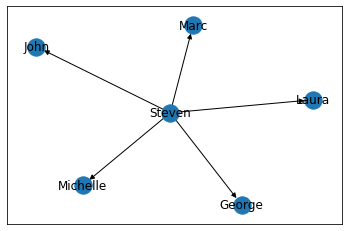

In [47]:
S = nx.bfs_tree(G_symmetric, 'Steven')
nx.draw_networkx(S)

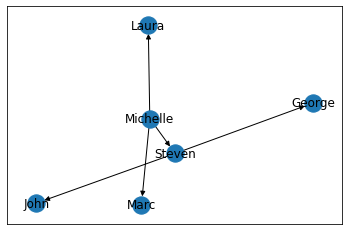

In [48]:
M = nx.bfs_tree(G_symmetric, 'Michelle')
nx.draw_networkx(M)

### Eccentricity
Eccentricity of a node A is defined as the largest distance between A and all other nodes.

It can be found using `nx.eccentricity()` function. In the symmetric employee-network, Michelle has an eccentricity of 2, and Steven has an eccentricity of 1 (he is connected to every other node).

In [18]:
nx.eccentricity(G_symmetric,'Michelle')

2

In [19]:
nx.eccentricity(G_symmetric,'Steven')

1

## 1.4 Centrality measures
Above we learned some of the network distance measures and they are useful in knowing how the information will spread through the network.

In this section, we will learn how to find the most important nodes (individuals) in the network. These parameters are called as centrality measures. Centrality Measures can help us in identifying popularity, most liked, and biggest influencers within the network.

### Degree Centrality
The people most popular or more liked usually are the ones who have more friends.

Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections. NetworkX has the function `degree_centrality()` to calculate the degree centrality of all the nodes of a network.

In [20]:
nx.degree_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.4,
 'Marc': 0.4,
 'John': 0.4,
 'Michelle': 0.6000000000000001,
 'George': 0.4}

### Eigenvector Centrality
It is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node.

Eigenvector centrality is a measure of how import a node is by accounting for the fact of how well it is connected to other important nodes. In fact, Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node $i$ is the $i$-th element of the vector $x$ defined by the equation

$Ax = \lambda x$

where $A$ is the adjacency matrix of the graph `G` with eigenvalue $\lambda$. By virtue of the Perron–Frobenius theorem, there is a unique solution $x$, all of whose entries are positive, if $\lambda$ is the largest eigenvalue of the adjacency matrix $A$.
We can use the `eigenvector_centrality()` function of NetworkX to calculate eigenvector centrality of all the nodes in a network.

The Google’s Pagerank algorithm is a variant of Eigenvector centrality algorithm.

In [21]:
nx.eigenvector_centrality(G_symmetric)

{'Steven': 0.6006686104947806,
 'Laura': 0.3545677660798074,
 'Marc': 0.3545677660798074,
 'John': 0.30844592433424667,
 'Michelle': 0.4443904166426225,
 'George': 0.30844592433424667}

### Closeness Centrality
Closeness Centrality is a measure where each node’s importance is determined by closeness to all other nodes. Closeness centrality of a node `u` is the reciprocal of the average shortest path distance to `u` over all `n-1` reachable nodes.

$ C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$

where `d(v, u)` is the shortest-path distance between `v` and `u`, and `n` is the number of nodes that can reach `u`. Notice that the closeness distance function computes the incoming distance to `u` for directed graphs. To use outward distance, act on `G.reverse()`. Notice that higher values of closeness indicate higher centrality.

Wasserman and Faust propose an improved formula for graphs with more than one connected component. The result is "a ratio of the fraction of actors in the group who are reachable, to the average distance" from the reachable actors. You might think this scale factor is inverted but it is not. As is, nodes from small components receive a smaller closeness value. Letting `N` denote the number of nodes in the graph,

$    C_{WF}(u) = \frac{n-1}{N-1} \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$


In [22]:
nx.closeness_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.625,
 'Marc': 0.625,
 'John': 0.625,
 'Michelle': 0.7142857142857143,
 'George': 0.625}

### Betweenness Centrality
The Betweenness Centrality is the centrality of control. It represents the frequency at which a point occurs on the shortest paths that connected pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes.
The nodes with high betweenness centrality play a significant role in the communication/information flow within the network.

The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.
Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$


$c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$

where $V$ is the set of nodes, $\sigma(s, t)$ is the number of shortest $(s, t)$-paths,  and $\sigma(s, t|v)$ is the number of those paths  passing through some  node $v$ other than $s, t$. If $s = t$, $\sigma(s, t) = 1$, and if $v \in {s, t}$, $\sigma(s, t|v) = 0$.

Networkx has the function `betweenness_centrality()` to measure it for the network. It has options to select if we want betweenness values to be normalized or not, weights to be included in centrality calculation or not, and to include the endpoints in the shortest path counts or not.
If you set `normalized = True` the betweenness values are normalized by `2/((n-1)(n-2))` for graphs, and `1/((n-1)(n-2))` for directed graphs where `n` is the number of nodes in G.


In [23]:
nx.betweenness_centrality(G_symmetric)

{'Steven': 0.65,
 'Laura': 0.0,
 'Marc': 0.0,
 'John': 0.0,
 'Michelle': 0.05,
 'George': 0.0}

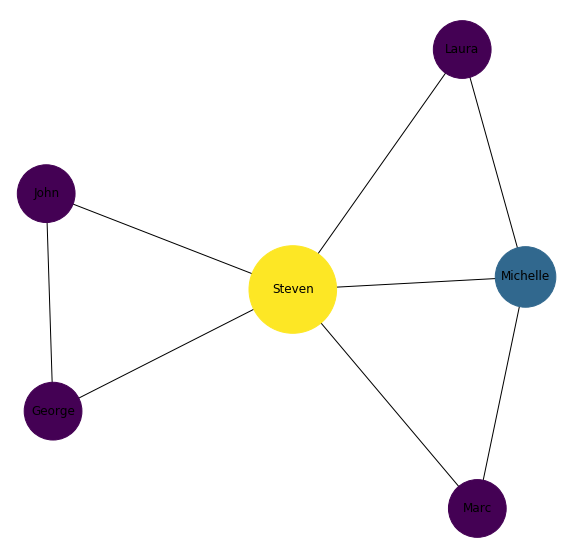

In [52]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [25]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Steven', 'Michelle', 'Laura', 'Marc', 'John']

## Facebook Case Study
This dataset consists of ‘circles’ (or ‘friends lists’) from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

Facebook data has been anonymized by replacing the Facebook-internal ids for each user with a new value. Also, while feature vectors from this dataset have been provided, the interpretation of those features has been obscured. For instance, where the original dataset may have contained a feature “political=Democratic Party”, the new data would simply contain “political=anonymized feature 1”. Thus, using the anonymized data it is possible to determine whether two users have the same political affiliations, but not what their individual political affiliations represent.

Source: J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012

Let us start with the Facebook data, for our analysis here we will use Facebook combined ego networks dataset, it contains the aggregated network of ten individuals’ Facebook friends list.

We read in the file and construct the Graph:

In [26]:
df = pd.read_csv('facebook_combined.txt')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 1 columns):
0 1    88233 non-null object
dtypes: object(1)
memory usage: 689.4+ KB


In [27]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


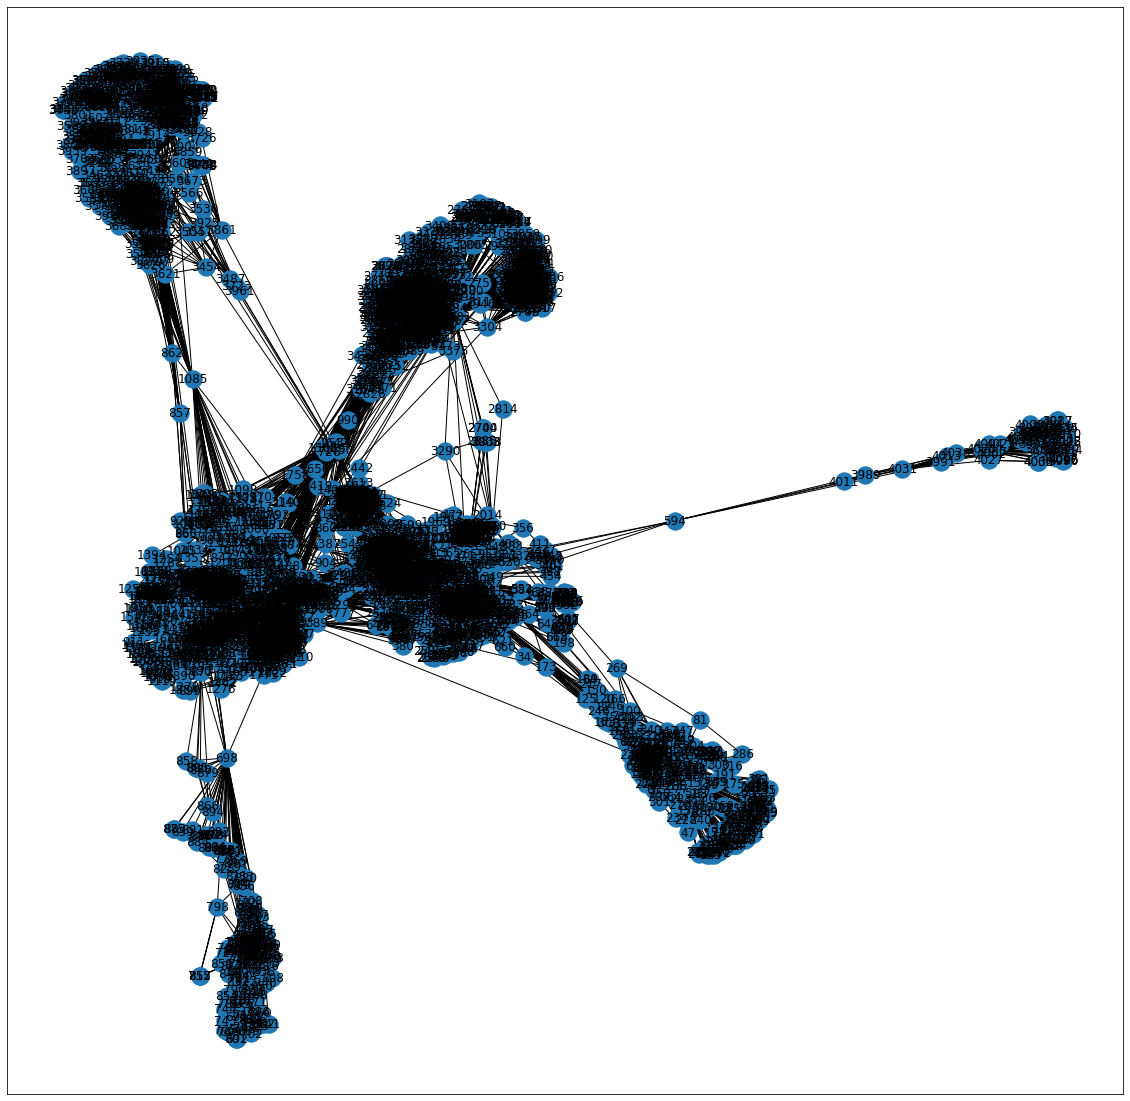

In [28]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

We can also visualize the network such that the node color varies with Degree and node size with Betweenness Centrality. The code to do this is:

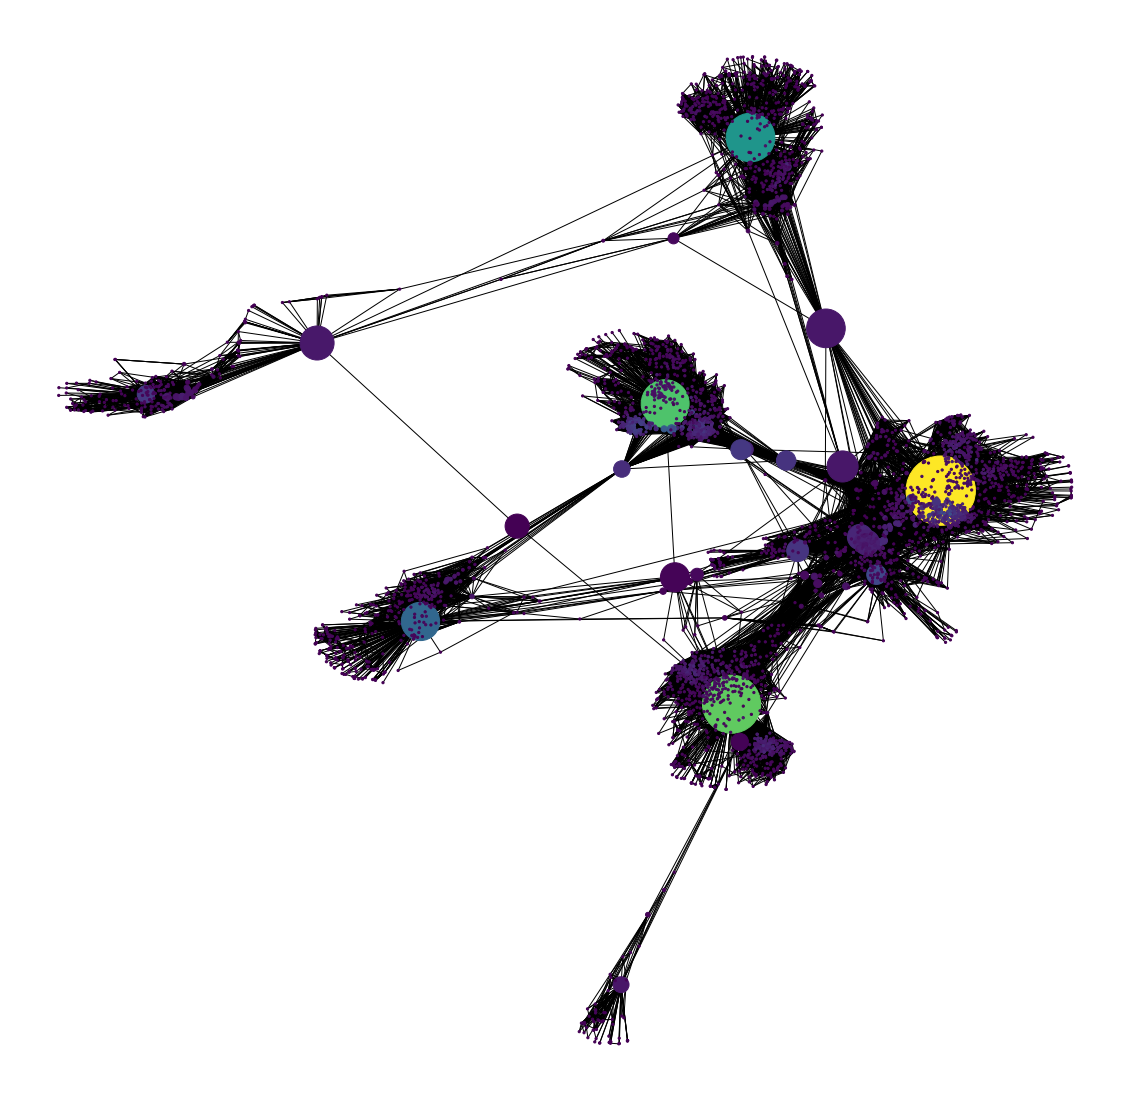

In [29]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

You can also know the labels of the nodes with the highest betweenness centrality using:

In [30]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

We can see that some nodes are common between Degree Centrality, which is a measure of degree, and Betweenness Centrality which controls the information flow.

It is natural that nodes that are more connected also lie on shortest paths between other nodes. The node 1912 is an important node as it is crucial according to all three centrality measures that we had considered.

-----